<a href="https://colab.research.google.com/github/SMRayeed/Forage-Tasks/blob/main/British%20Airways/Review%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import requests
from bs4 import BeautifulSoup

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from textblob import Word, TextBlob
from wordcloud import WordCloud , STOPWORDS

from sklearn.decomposition import NMF, LatentDirichletAllocation

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [94]:
website = "https://www.airlinequality.com/airline-reviews/british-airways"
total_pages = 50
reviews_per_page = 100

reviews = []

for page_num in range(1, total_pages + 1):

    print(f"Fetching data from Page {page_num}")
    page_url = f"{website}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={reviews_per_page}"
    response = requests.get(page_url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for review_div in parsed_content.find_all("div", {"class": "text_content"}) : reviews.append(review_div.get_text())
    print(f"   ---> {len(reviews)} Total Reviews")

Fetching data from Page 1
   ---> 100 Total Reviews
Fetching data from Page 2
   ---> 200 Total Reviews
Fetching data from Page 3
   ---> 300 Total Reviews
Fetching data from Page 4
   ---> 400 Total Reviews
Fetching data from Page 5
   ---> 500 Total Reviews
Fetching data from Page 6
   ---> 600 Total Reviews
Fetching data from Page 7
   ---> 700 Total Reviews
Fetching data from Page 8
   ---> 800 Total Reviews
Fetching data from Page 9
   ---> 900 Total Reviews
Fetching data from Page 10
   ---> 1000 Total Reviews
Fetching data from Page 11
   ---> 1100 Total Reviews
Fetching data from Page 12
   ---> 1200 Total Reviews
Fetching data from Page 13
   ---> 1300 Total Reviews
Fetching data from Page 14
   ---> 1400 Total Reviews
Fetching data from Page 15
   ---> 1500 Total Reviews
Fetching data from Page 16
   ---> 1600 Total Reviews
Fetching data from Page 17
   ---> 1700 Total Reviews
Fetching data from Page 18
   ---> 1800 Total Reviews
Fetching data from Page 19
   ---> 1900 Total 

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
df = pd.DataFrame()
df["reviews"] = reviews

In [97]:
len(df)

3695

In [98]:
count = 0

for ix in range(len(df)) :
  review_text = df.loc[ix, 'reviews']
  if not review_text : count += 1

In [99]:
print("Total None : ", count)

Total None :  0


In [100]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [101]:
df.head()

,reviews
0,Booked online months ago and the only hitch ...
1,The flight was on time. The crew were polite...
2,"Angry, disappointed, and unsatisfied. My rou..."
3,"As an infrequent flyer, British Airways was ..."
4,"A totally unremarkable flight, on time, as c..."


In [102]:
for ix in range(10) :
  print(df.loc[ix, 'reviews'])

  Booked online months ago and the only hitch was replacement aircraft meaning chosen seats were different. I was informed of this prior to departure so could amend. Bag drop at MAN T3 wasn't smooth but I suspect that was MAN fault. Shuttle boarding was slow and delayed meaning a rush at LHR T5. The flight to CPT was full but we left more or less on time. The cabin was clean and PE was what we expected, sufficient leg and arm room plus a few little perks with drinks. Only complaint is the seats actually recline too far. Staff were very good during the first few hours of service, especially George. Food was quite tasty but one option wasn't loaded. Breakfast was also quite tasty and we landed on time. The fly in the ointment is both our cases arrived late on the carousel and only later did we notice both had been broken into, likely at CPT. All in all a pleasant surprise.
  The flight was on time. The crew were polite. It was the same story on my outward flight. I find that BA in Europe

In [103]:
def replace(text):
    text = re.sub(r'[^A-Za-z]+', ' ', str(text))
    return text

In [104]:
df['reviews']= df["reviews"].apply(replace)

In [105]:
df.head()

,reviews
0,Booked online months ago and the only hitch w...
1,The flight was on time The crew were polite I...
2,Angry disappointed and unsatisfied My route w...
3,As an infrequent flyer British Airways was al...
4,A totally unremarkable flight on time as comf...


In [106]:
df['reviews'] = df['reviews'].str.lower()

In [107]:
df.head()

,reviews
0,booked online months ago and the only hitch w...
1,the flight was on time the crew were polite i...
2,angry disappointed and unsatisfied my route w...
3,as an infrequent flyer british airways was al...
4,a totally unremarkable flight on time as comf...


In [108]:
for ix in range(10) :
  print(df.loc[ix, 'reviews'])

 booked online months ago and the only hitch was replacement aircraft meaning chosen seats were different i was informed of this prior to departure so could amend bag drop at man t wasn t smooth but i suspect that was man fault shuttle boarding was slow and delayed meaning a rush at lhr t the flight to cpt was full but we left more or less on time the cabin was clean and pe was what we expected sufficient leg and arm room plus a few little perks with drinks only complaint is the seats actually recline too far staff were very good during the first few hours of service especially george food was quite tasty but one option wasn t loaded breakfast was also quite tasty and we landed on time the fly in the ointment is both our cases arrived late on the carousel and only later did we notice both had been broken into likely at cpt all in all a pleasant surprise 
 the flight was on time the crew were polite it was the same story on my outward flight i find that ba in europe is generally pretty 

In [109]:
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')

In [110]:
df.head()

,reviews
0,booked online months ago and the only hitch w...
1,the flight was on time the crew were polite i...
2,angry disappointed and unsatisfied my route w...
3,as an infrequent flyer british airways was al...
4,a totally unremarkable flight on time as comf...


In [111]:
for ix in range(10) :
  print(df.loc[ix, 'reviews'])

 booked online months ago and the only hitch was replacement aircraft meaning chosen seats were different i was informed of this prior to departure so could amend bag drop at man t wasn t smooth but i suspect that was man fault shuttle boarding was slow and delayed meaning a rush at lhr t the flight to cpt was full but we left more or less on time the cabin was clean and pe was what we expected sufficient leg and arm room plus a few little perks with drinks only complaint is the seats actually recline too far staff were very good during the first few hours of service especially george food was quite tasty but one option wasn t loaded breakfast was also quite tasty and we landed on time the fly in the ointment is both our cases arrived late on the carousel and only later did we notice both had been broken into likely at cpt all in all a pleasant surprise 
 the flight was on time the crew were polite it was the same story on my outward flight i find that ba in europe is generally pretty 

In [112]:
df['reviews'] = df['reviews'].str.replace('\d', '')

In [113]:
df.head()

,reviews
0,booked online months ago and the only hitch w...
1,the flight was on time the crew were polite i...
2,angry disappointed and unsatisfied my route w...
3,as an infrequent flyer british airways was al...
4,a totally unremarkable flight on time as comf...


In [114]:
for ix in range(10) :
  print(df.loc[ix, 'reviews'])

 booked online months ago and the only hitch was replacement aircraft meaning chosen seats were different i was informed of this prior to departure so could amend bag drop at man t wasn t smooth but i suspect that was man fault shuttle boarding was slow and delayed meaning a rush at lhr t the flight to cpt was full but we left more or less on time the cabin was clean and pe was what we expected sufficient leg and arm room plus a few little perks with drinks only complaint is the seats actually recline too far staff were very good during the first few hours of service especially george food was quite tasty but one option wasn t loaded breakfast was also quite tasty and we landed on time the fly in the ointment is both our cases arrived late on the carousel and only later did we notice both had been broken into likely at cpt all in all a pleasant surprise 
 the flight was on time the crew were polite it was the same story on my outward flight i find that ba in europe is generally pretty 

In [126]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [118]:
df["reviews"].apply(lambda x: TextBlob(x).words).head()

0    [booked, online, months, ago, and, the, only, ...
1    [the, flight, was, on, time, the, crew, were, ...
2    [angry, disappointed, and, unsatisfied, my, ro...
3    [as, an, infrequent, flyer, british, airways, ...
4    [a, totally, unremarkable, flight, on, time, a...
Name: reviews, dtype: object

In [119]:
for ix in range(10) :
  print(df.loc[ix, 'reviews'])

 booked online months ago and the only hitch was replacement aircraft meaning chosen seats were different i was informed of this prior to departure so could amend bag drop at man t wasn t smooth but i suspect that was man fault shuttle boarding was slow and delayed meaning a rush at lhr t the flight to cpt was full but we left more or less on time the cabin was clean and pe was what we expected sufficient leg and arm room plus a few little perks with drinks only complaint is the seats actually recline too far staff were very good during the first few hours of service especially george food was quite tasty but one option wasn t loaded breakfast was also quite tasty and we landed on time the fly in the ointment is both our cases arrived late on the carousel and only later did we notice both had been broken into likely at cpt all in all a pleasant surprise 
 the flight was on time the crew were polite it was the same story on my outward flight i find that ba in europe is generally pretty 

In [122]:
sw = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [124]:
df.head()

,reviews
0,booked online months ago hitch replacement air...
1,flight time crew polite story outward flight f...
2,angry disappointed unsatisfied route london at...
3,infrequent flyer british airways always first ...
4,totally unremarkable flight time comfortable e...


In [127]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviews'].head(10)

0    booked online month ago hitch replacement airc...
1    flight time crew polite story outward flight f...
2    angry disappointed unsatisfied route london at...
3    infrequent flyer british airway always first c...
4    totally unremarkable flight time comfortable e...
5    ground crew heathrow left passenger luggage ba...
6    london heathrow gibraltar th october shall sta...
7    first time flying british airway would hesitat...
8    flew london cairo return october basically per...
9    absolutely worst experience ever flew heathrow...
Name: reviews, dtype: object

In [128]:
df.head()

,reviews
0,booked online month ago hitch replacement airc...
1,flight time crew polite story outward flight f...
2,angry disappointed unsatisfied route london at...
3,infrequent flyer british airway always first c...
4,totally unremarkable flight time comfortable e...


In [129]:
cv = CountVectorizer()
x = cv.fit_transform(reviews)

In [130]:
x

<3695x13999 sparse matrix of type '<class 'numpy.int64'>'
	with 372642 stored elements in Compressed Sparse Row format>

In [131]:
def print_top_words(model, feature_names, n_top_words):
  for index, topic in enumerate(model.components_):
      message = "\nTopic #{}:".format(index)
      message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
      print(message)
      print("="*70)

In [132]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [133]:
lda.fit(x)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [135]:
n_top_words = 40
print("\nTopics in LDA model: ")
cv_feature_names = cv.get_feature_names_out()
print_top_words(lda, cv_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:docklands amends emotional callous nope disrupt cruelty 1155pm altercation moron screwed lagged supercomputer algorithm essence wrongs agonizing sans ineffective draining significance wrenching abdication opportunities err brunt nephew gut funky 20am mishandling 40am disrupted trusting the flight to was it in

Topic #1:and flight not the to but their be airline hours of in no didn time ba back while now does even with mins about fell would 30 having care another customers eggs sausage horrible really decent used has verified meal

Topic #2:txl fort mct avianca marriage den wir jaded article relieve und commonplace sodium soulless colors flavorful 261 lon 2004 and blanc pepper lauderdale economist we 004 spots 118 the es fixing limp malta 932 937 ud to disconcerting our ec

Topic #3:the was to ba and flight verified worst ryanair out said of will find hasten there guzzlers from us costs or odds medicines with 20 economy debris even a4 when re everyone ow

In [137]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

first_topic_words = [cv_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [cv_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [cv_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [cv_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

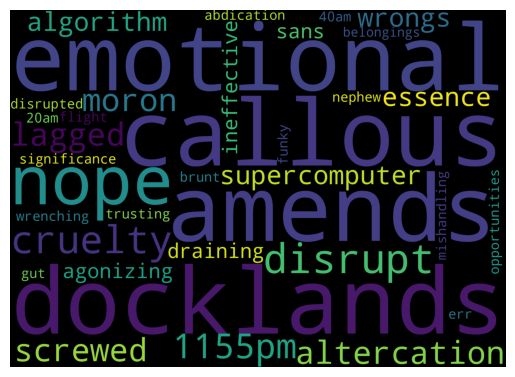

In [138]:
# Generating the wordcloud with the values for first topic
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

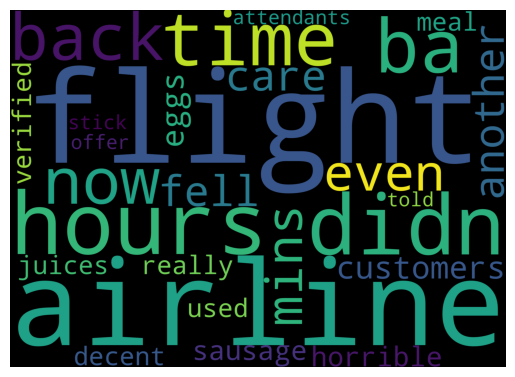

In [139]:
# Generating the wordcloud with the values for Second topic
secondcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()

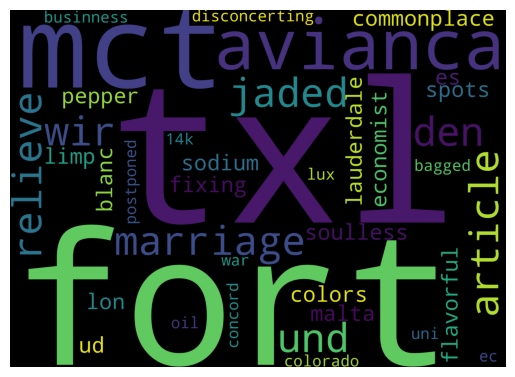

In [140]:
# Generating the wordcloud with the values for third topic
thirdcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()

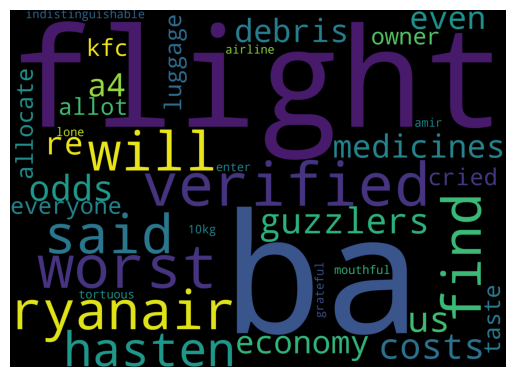

In [141]:
# Generating the wordcloud with the values for fouth topic
fourthcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()

In [142]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)


def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Sentiment,Analysis
0,booked online month ago hitch replacement airc...,-0.2350,Negative
1,flight time crew polite story outward flight f...,0.2500,Neutral
2,angry disappointed unsatisfied route london at...,-0.6705,Negative
3,infrequent flyer british airway always first c...,0.3400,Neutral
4,totally unremarkable flight time comfortable e...,0.4951,Neutral


In [143]:
analysis = df['Analysis'].value_counts()

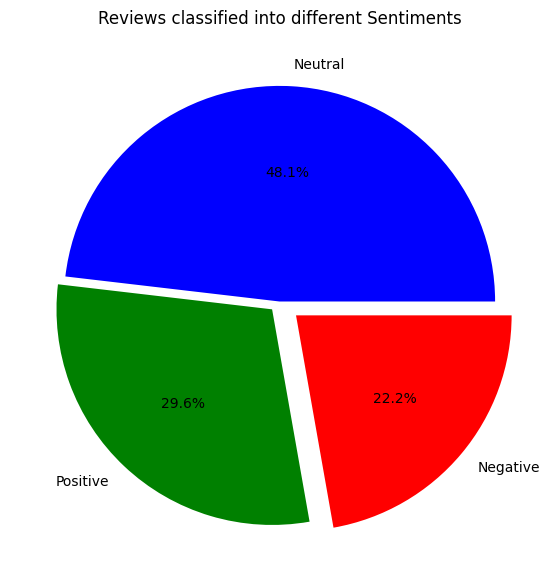

In [144]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,2)
plt.title("Reviews classified into different Sentiments")
plt.pie(analysis.values, labels = analysis.index, explode = (0, 0.05, 0.1), autopct='%1.1f%%', shadow=False , colors=("blue", "green", "red"))
plt.show()

In [145]:
all_words = df['reviews'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies in the dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

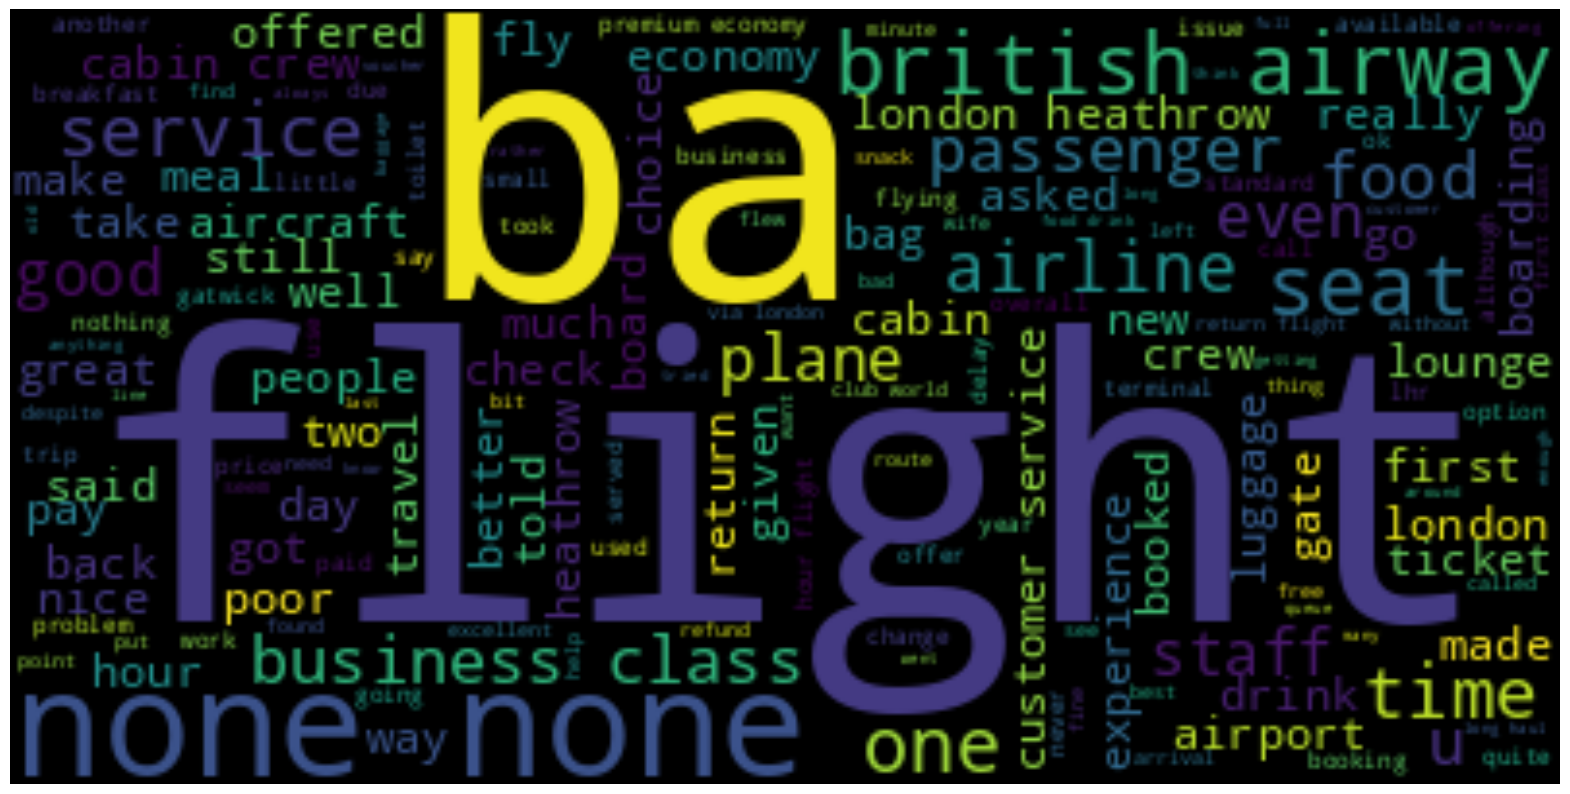

In [146]:
text = " ".join(i for i in df.reviews)
wordcloud = WordCloud().generate(text)
fig = plt.figure(1, figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()